<a class="anchor" id="0"></a>
## **Sentiment Analysis in Python**

Sentiment Analysis aims to determine a writer's attitude towards a topic or the overall contextual polarity of a document. The attitude can be his judgement or assessment, his emotional state or the
intended emotional communication.

In Sentimental Analysis, the main task is to identify opinion words, which is very important. Opinion words are dominant indicators of feelings, especially adjectives, adverbs and verbs. For Example: "I Love this Camera. It's Amazing!".

Opinion words are also known as polarity words, Sentiment words, opinion lexicon, or opinion words, which can generally be divided into two types: 
1. Positive words - E.g, Wonderful, Elegant, Astonishing
2. Negative words - E.g, Horrible, Disgusting, Poor

### Read in data

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Sentiment_Analysis_Dataset.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


### About Data

After reading the dataset which contains 40k movie reviews from IMDB, We see that there are two prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the 0's and 1's, where
- 0: NEGATIVE 
- 1: POSITIVE

### Preprocessing Steps

In [4]:
# 1. Shape of the data

data.shape

(40000, 2)

In [5]:
data = data.iloc[:10000, :]

In [6]:
data.shape

(10000, 2)

In [7]:
# 2. Check for null values in the Dataset

data.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
# 3. Information related to the Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [9]:
# 4. Check for Duplicated values in the Dataset

data.duplicated().sum()

13

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
# 5. Mathematical Description of the Dataset

data.describe()

,label
count,9987.000000
mean,0.496145
std,0.500010
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Working with Label

In [13]:
data['label'].value_counts()

0    5032
1    4955
Name: label, dtype: int64

<AxesSubplot:>

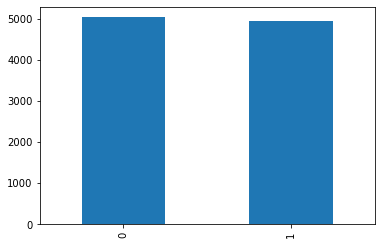

In [14]:
data['label'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Label Distribution')

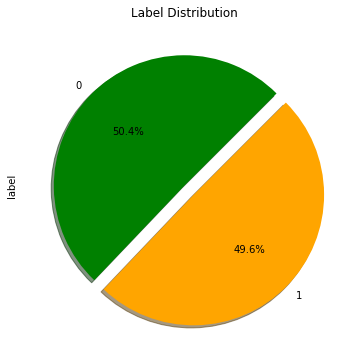

In [15]:
plt.figure(figsize=(10, 6))
colors = ['green', 'orange']
data['label'].value_counts().plot(kind='pie', autopct='%.1f%%', shadow=True, colors=colors,
                                  startangle=45, explode=(0, 0.1))

plt.title('Label Distribution')

### Working with Text

In [16]:
data['text'][999]

'...but I regret having seen it. Since the ratings on IMDb are relatively high (and they must also have been relatively high on Netflix), I guess I put it in my queue because it is advertised as a gentle comedy from the UK, a category that has produced many films I liked immensely. "Saving Grace," on the other hand, falls into the category of laugh-less comedies usually populated by Hollywood movies produced and directed by the talentless. Brenda Blethyn is a capable actress, and I have liked her in other movies. The concept -- a gardener growing marijuana to overcome the penury she finds herself confronting after her husband\'s death -- does not offend me. Notwithstanding the strenuous efforts on the part of the cast to produce humor, the film falls flat on its face (falling flat on its arse might have been funnier) as far as I and my wife were concerned. Be forewarned, oh gentle reader, not all offbeat British comedies succeed. This one is a dud.'

<a class="anchor" id="0"></a>
### Clearning Steps

1. removing HTML Tags
2. extracting emojies # The pattern re.compile('(?::|;|=)(?:-)?(?:)|(|D|P)') is a regular expression used to match and extract emojis from given text.
3. removing special chars, puntuation, symbols
4. lower casing
5. removing stopwords
6. tokenization

In [17]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [18]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')
    
    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]
    
    return " ".join(text)

In [19]:
preprocessing("this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>")

'tag helo world :)'

In [20]:
data['text'] = data['text'].apply(lambda x: preprocessing(x))

In [21]:
data['text']

0       grew b 1965 watch love thunderbird mate school...
1       put movi dvd player sat coke chip expect hope ...
2       peopl know particular time past like feel need...
3       even though great interest biblic movi bore de...
4       im die hard dad armi fan noth ever chang got t...
                              ...                        
9995    one cerebr insight movi ever seen script langu...
9996    first movi near complet guess someon actual bo...
9997    said movi cross dress gangster much averag ind...
9998    like adult comedi cartoon like south park near...
9999    well start straighthead present bit dilemma fi...
Name: text, Length: 9987, dtype: object

### Visualizing Negative and Positive words

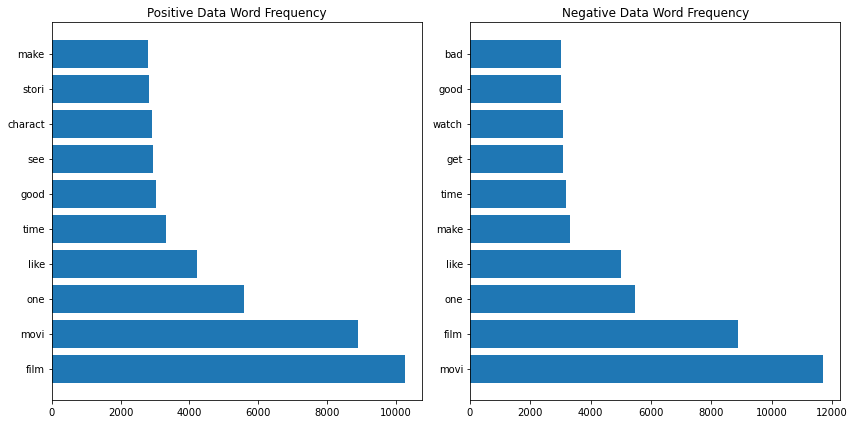

In [22]:
positivedata = data[data['label'] == 1]
positivedata = positivedata['text']
negdata = data[data['label'] == 0]
negdata = negdata['text']

import matplotlib.pyplot as plt
from collections import Counter

# Positive Data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)    # Display top 10 common words

# Negative Data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)     # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive Data word Frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative Data word Frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

### TF-IDF Vertorizer to convert the raw documents into feature matrix

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        use_idf=True, norm='l2', smooth_idf=True)
y = data.label.values
x = tfidf.fit_transform(data.text)

<a class="anchor" id="0"></a>
### Training Machine Learning Model for Sentiment Analysis

Now to train a machine learning model, I will split the data into 50% training and 50% test sets

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.5, shuffle=False)

In [25]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=6, scoring='accuracy', random_state=0, n_jobs=-1, verbose=3, max_iter=500).fit(X_train, y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:   35.9s remaining:   17.9s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   36.2s finished


### Accuracy

In [26]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8758510212254705


### Pickle Files

In [27]:
import pickle

pickle.dump(clf, open('clf.pkl', 'wb'))
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

### Prediction

In [28]:
data['text'][9995]

'one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within'

In [29]:
data['text'][0]

'grew b 1965 watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count 5 becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment'

In [30]:
def prediction(comment):
    preprocessed_comments = preprocessing(comment)
    comment_list = [preprocessed_comments]
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction


prediction1 = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')

In [31]:
if prediction1 == 1:
    print("Positive Comment")
else:
    print("Negative Comment")

Positive Comment


In [32]:
def prediction(comment):
    preprocessed_comments = preprocessing(comment)
    comment_list = [preprocessed_comments]
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction


prediction2 = prediction('grew b 1965 watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count 5 becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment')

In [33]:
if prediction2 == 1:
    print("Positive Comment")
else:
    print("Negative Comment")

Negative Comment
